# Plot average images

In [1]:
import sys, os
sys.path.append('../')

import logging
import numpy as np
import matplotlib.pyplot as plt

from simulation.units import *

logging.basicConfig(
    format='%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s',
    datefmt='%H:%M',
    level=logging.INFO
)

## Setting

In [2]:
setting = "mass"

## Load data

In [4]:
#x = np.load("../data/samples/x_train_mass.npz")
#np.save("../data/samples/x_train_mass.npy", x['arr_0'])
#del x

In [5]:
theta = np.load("../data/samples/theta_train_{}.npy".format(setting)).reshape((-1,2))
x = np.load("../data/samples/x_train_{}.npy".format(setting))
y = np.load("../data/samples/y_train_{}.npy".format(setting))
#t_xz = np.load("../data/samples/t_xz_train_{}.npy".format(setting))
#r_xz = np.load("../data/samples/r_xz_train_{}.npy".format(setting))

In [6]:
theta.shape

(640000, 2)

In [14]:
np.all(np.isfinite(x))

True

In [15]:
np.all(np.isfinite(theta))

True

In [16]:
np.all(np.isfinite(y))

True

## Calculate averages

In [7]:
avg_x_prior = np.mean(x[y==1], axis=0)
std_x_prior = np.std(x[y==1], axis=0)

In [8]:
alpha_boundaries = (0., 0.06, 0.14, 0.2)
beta_boundaries = (-2.5,-2.1,-1.7,-1.5)

avg_x_theta = np.empty((3,3,64,64), dtype=x.dtype)
std_x_theta = np.empty((3,3,64,64), dtype=x.dtype)

for i, (alpha_min, alpha_max) in enumerate(zip(alpha_boundaries[:-1], alpha_boundaries[1:])):
    for j, (beta_min, beta_max) in enumerate(zip(beta_boundaries[:-1], beta_boundaries[1:])):
        cut = (y == 0) * (theta[:,0] >= alpha_min) * (theta[:,0] < alpha_max) * (theta[:,1] >= beta_min) * (theta[:,1] < beta_max)
        avg_x_theta[i,j] = np.mean(x[cut], axis=0)
        std_x_theta[i,j] = np.std(x[cut], axis=0)

In [9]:
avg_x_theta_check = np.empty((3,3,64,64), dtype=x.dtype)
std_x_theta_check = np.empty((3,3,64,64), dtype=x.dtype)

for i, (alpha_min, alpha_max) in enumerate(zip(alpha_boundaries[:-1], alpha_boundaries[1:])):
    for j, (beta_min, beta_max) in enumerate(zip(beta_boundaries[:-1], beta_boundaries[1:])):
        cut = (y == 1) * (theta[:,0] >= alpha_min) * (theta[:,0] < alpha_max) * (theta[:,1] >= beta_min) * (theta[:,1] < beta_max)
        avg_x_theta_check[i,j] = np.mean(x[cut], axis=0)
        std_x_theta_check[i,j] = np.std(x[cut], axis=0)

In [10]:
alpha_descr = [r"$f_{sub} < 0.06$", r"$0.06 < f_{sub} < 0.14$", r"$0.14 < f_{sub}$"]
beta_descr = [r"$\beta < -2.1$", r"$-2.1 < \beta < -1.7$", r"$-1.7 < \beta$"]

## Average image from prior

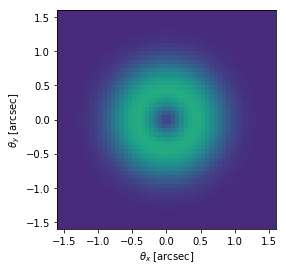

In [11]:
plt.figure(figsize=(4,4))
        
plt.imshow(
    np.log10(avg_x_prior),
    vmin=2.3,
    vmax=3.2,
    cmap='viridis',
    extent=(-2.,2.,-2.,2.),
    origin="lower"
)

plt.xlim(-1.6,1.6)
plt.ylim(-1.6,1.6)

plt.xlabel(r"$\theta_x$ [arcsec]")
plt.ylabel(r"$\theta_y$ [arcsec]")

plt.tight_layout()
plt.savefig("../figures/average_image_{}_prior.pdf".format(setting))

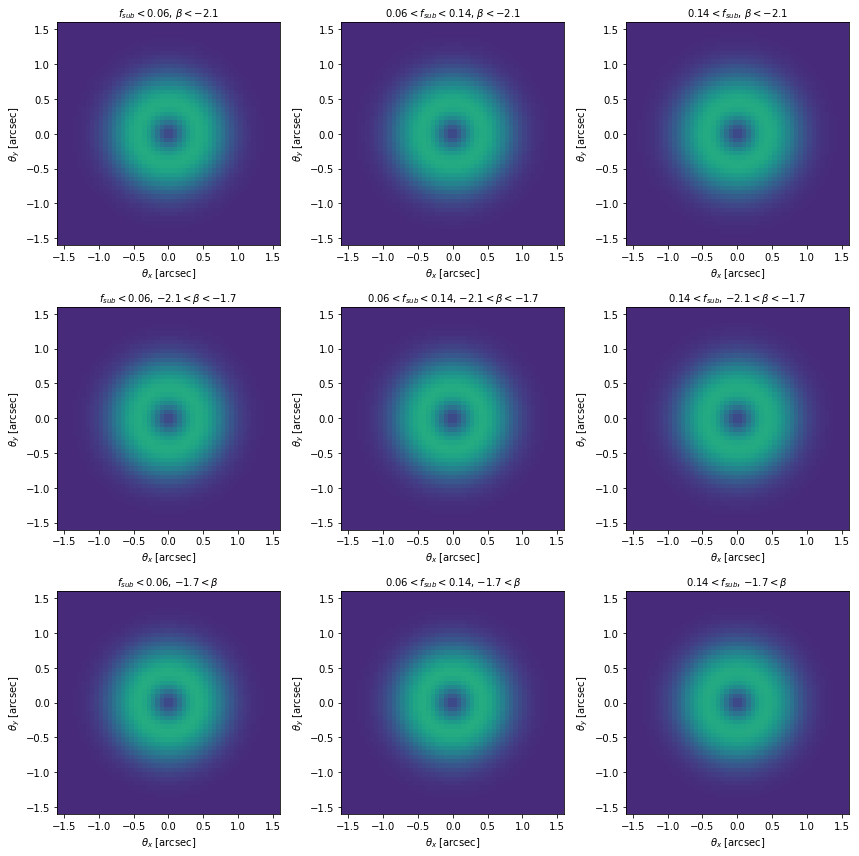

In [12]:
plt.figure(figsize=(12,12))

for i in range(3):
    for j in range(3):
        ax = plt.subplot(3, 3, j*3 + i + 1)
        
        plt.imshow(
            np.log10(avg_x_theta[i,j]),
            vmin=2.3,
            vmax=3.2,
            cmap='viridis',
            extent=(-2.,2.,-2.,2.),
            origin="lower"
        )
    
        plt.xlim(-1.6,1.6)
        plt.ylim(-1.6,1.6)
    
        plt.title(alpha_descr[i] + ", " + beta_descr[j],fontsize=10)
        plt.xlabel(r"$\theta_x$ [arcsec]")
        plt.ylabel(r"$\theta_y$ [arcsec]")
    
plt.tight_layout()
plt.savefig("../figures/average_image_{}_theta.pdf".format(setting))

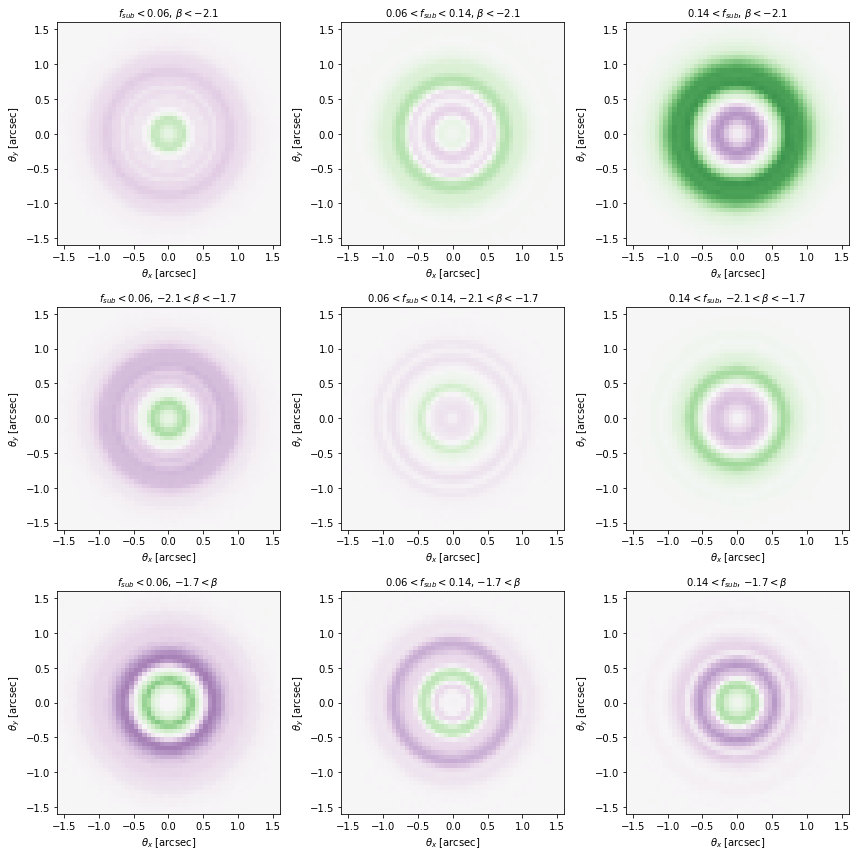

In [18]:
plt.figure(figsize=(12,12))

for i in range(3):
    for j in range(3):
        ax = plt.subplot(3, 3, j*3 + i + 1)
        
        plt.imshow(
            avg_x_theta[i,j]-avg_x_prior,
            vmin=-20,
            vmax=20,
            cmap='PRGn',
            extent=(-2.,2.,-2.,2.),
            origin="lower"
        )
    
        plt.xlim(-1.6,1.6)
        plt.ylim(-1.6,1.6)
    
        plt.title(alpha_descr[i] + ", " + beta_descr[j],fontsize=10)
        plt.xlabel(r"$\theta_x$ [arcsec]")
        plt.ylabel(r"$\theta_y$ [arcsec]")
    
plt.tight_layout()
plt.savefig("../figures/average_image_{}_theta_minus_prior.pdf".format(setting))

## Same for variance

In [ ]:
plt.figure(figsize=(4,4))
        
plt.imshow(
    std_x_prior/avg_x_prior,
    vmin=0.,
    vmax=1.5,
    cmap='viridis',
    extent=(-2.,2.,-2.,2.),
    origin="lower"
)

plt.xlim(-1.6,1.6)
plt.ylim(-1.6,1.6)

plt.xlabel(r"$\theta_x$ [arcsec]")
plt.ylabel(r"$\theta_y$ [arcsec]")

plt.tight_layout()
plt.savefig("../figures/std_image_prior.pdf")

In [ ]:
plt.figure(figsize=(12,12))

for i in range(3):
    for j in range(3):
        ax = plt.subplot(3, 3, j*3 + i + 1)
        
        plt.imshow(
            std_x_theta[i,j]/avg_x_theta[i,j],
            vmin=0.,
            vmax=1.5,
            cmap='viridis',
            extent=(-2.,2.,-2.,2.),
            origin="lower"
        )
    
        plt.xlim(-2,2)
        plt.ylim(-2,2)
    
        plt.title(alpha_descr[i] + ", " + beta_descr[j],fontsize=10)
        plt.xlabel(r"$\theta_x$ [arcsec]")
        plt.ylabel(r"$\theta_y$ [arcsec]")
    
plt.tight_layout()
plt.savefig("../figures/std_image_theta.pdf")